In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline

In [2]:
heart_df=pd.read_csv("framingham.csv")
heart_df.drop(['education'],axis=1,inplace=True)
heart_df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
heart_df.rename(columns={'male':'Sex_male'},inplace=True)
heart_df.head()

,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
heart_df.isnull().sum()


Sex_male             0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [5]:
heart_df.mode()

,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,240.0,120.0,80.0,22.19,75.0,75.0,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.54,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.91,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.48,NaN,NaN,NaN


In [6]:
heart_df.fillna(heart_df.mode(),inplace=True)

In [7]:
count=0
for i in heart_df.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of rows with missing values is ', count)
print('Total Rows: ', len(heart_df.index))
print('since it is only',round((count/len(heart_df.index))*100), 'percent of the entire dataset the rows with missing values are excluded.')

Total number of rows with missing values is  489
Total Rows:  4240
since it is only 12 percent of the entire dataset the rows with missing values are excluded.


In [8]:
heart_df.TenYearCHD.value_counts()
heart_df.dropna(inplace=True)

In [9]:
import sklearn
new_features=heart_df[['age','Sex_male','cigsPerDay','totChol','sysBP','glucose','TenYearCHD']]
x=new_features.iloc[:,:-1]
y=new_features.iloc[:,-1]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.10,random_state=5)

In [10]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

In [11]:
sklearn.metrics.accuracy_score(y_test,y_pred)

0.8776595744680851

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

In [13]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("Logistic Regression ::")
print("Accuracy = ", accuracy*100)
print(cm)

Logistic Regression ::
Accuracy =  87.7659574468085
[[327   2]
 [ 44   3]]


In [14]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [15]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("SVM ::")
print("Accuracy = ", accuracy*100)
print(cm)


SVM ::
Accuracy =  87.5
[[329   0]
 [ 47   0]]


In [16]:
#K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("K Nearest Neighbors :")
print("Accuracy = ", accuracy*100)
print(cm)

K Nearest Neighbors :
Accuracy =  85.90425531914893
[[318  11]
 [ 42   5]]


In [17]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("Gaussian Naive Bayes :")
print("Accuracy = ", accuracy*100)
print(cm)

Gaussian Naive Bayes :
Accuracy =  86.17021276595744
[[318  11]
 [ 41   6]]


In [18]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier as DT
classifier = DT(criterion='entropy', random_state=0)
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("Decision Tree Classifier :")
print("Accuracy = ", accuracy*100)
print(cm)

Decision Tree Classifier :
Accuracy =  77.6595744680851
[[281  48]
 [ 36  11]]


In [19]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier as RF
classifier = RF(n_estimators=10, criterion='entropy', random_state=0)
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("Random Forest Classifier :")
print("Accuracy = ", accuracy*100)
print(cm)

Random Forest Classifier :
Accuracy =  85.63829787234043
[[320   9]
 [ 45   2]]


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                84        
                                                                 
 dense_1 (Dense)             (None, 12)                156       
                                                                 
 dense_2 (Dense)             (None, 1)                 13        
                                                                 
Total params: 253 (1012.00 Byte)
Trainable params: 253 (1012.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/20
675/675 [==============================] - 5s 4ms/step - loss: 0.4575 - accuracy: 0.8444
Epoch 2/20
675/675 [==============================] - 3s 4ms/step - loss: 0.4509 - accuracy: 0.8444
Epoch 3/20
675/675 [==============================] - 3s 4ms/step - loss: 0

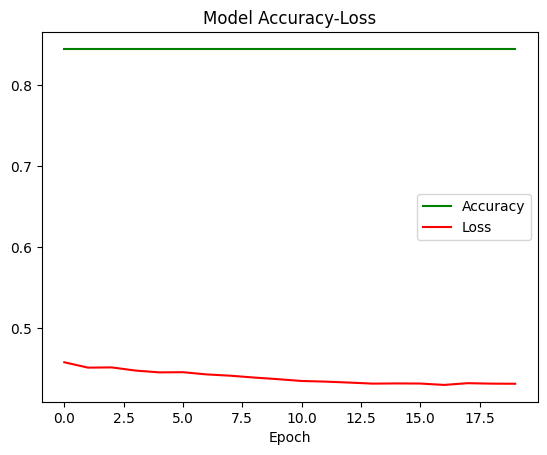

12/12 [==============================] - 0s 2ms/step
Artificial Neural Network Classifier :
Accuracy =  87.5
[[329   0]
 [ 47   0]]


In [20]:
#Artificial Neural Network
from keras.models import Sequential
from keras.layers import Dense

#Initialising ANN
classifier = Sequential()

#Adding the first hidden layer or the input layer
classifier.add(Dense(activation='relu',
                     kernel_initializer='uniform',
                     input_dim=6,
                     units=12))
#Adding the second hidden layer
classifier.add(Dense(activation='relu',
                     kernel_initializer='uniform',
                     units=12))
#Adding the output layer
classifier.add(Dense(activation='sigmoid',
                     kernel_initializer='uniform',
                     units=1))

#Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(classifier.summary())

#Fitting the ANN
history = classifier.fit(x_train, y_train, batch_size=5, epochs=20, verbose=1)
from matplotlib import pyplot as plt
print(history.history)
plt.plot(history.history['accuracy'],'green')
plt.plot(history.history['loss'],'red')
#plt.axis([0.0, 17.5, 0.0, 0.8 ])
plt.title('Model Accuracy-Loss')
plt.xlabel('Epoch')
plt.legend(['Accuracy','Loss'])
plt.show()

#Predicting the Test set Results
y_pred = classifier.predict(x_test)
y_pred = (y_pred>0.5) #Since output is probability
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("Artificial Neural Network Classifier :")
print("Accuracy = ", accuracy*100)
print(cm)